# Confidence Intervals Clearly Explained

Confidence intervals provide a way to estimate a range in which the true population parameter (e.g., mean) is likely to lie. In this notebook, we will explore confidence intervals and learn how to calculate them using bootstrapping.

## Bootstrapping Refresher

Bootstrapping is a statistical technique used to estimate the sampling distribution of a statistic by sampling with replacement from the original data. This method is useful for constructing confidence intervals and testing hypotheses.

### How Bootstrapping Works:
1. Draw multiple random samples (with replacement) from the original dataset.
2. Compute the desired statistic (e.g., mean) for each sample.
3. Use the distribution of these computed statistics to estimate variability or construct confidence intervals.

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a sample of 12 measurements
np.random.seed(123)
sample = np.random.normal(loc=50, scale=5, size=12)

# Calculate the sample mean
sample_mean = np.mean(sample)
sample

array([44.57184698, 54.98672723, 51.41489249, 42.46852643, 47.10699874,
       58.25718269, 37.86660378, 47.85543686, 56.32968129, 45.66629799,
       46.60556924, 49.52645516])

The generated sample represents our observed data. Let's calculate the bootstrap means and construct a 95% confidence interval.

In [9]:
# Bootstrap the sample
bootstrap_means = []
for _ in range(10000):
    bootstrap_sample = np.random.choice(sample, size=12, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])
ci_95

array([45.3264273 , 51.80169008])

### Visualizing the Bootstrap Distribution

The histogram below shows the distribution of bootstrap means. The red dashed lines indicate the bounds of the 95% confidence interval.

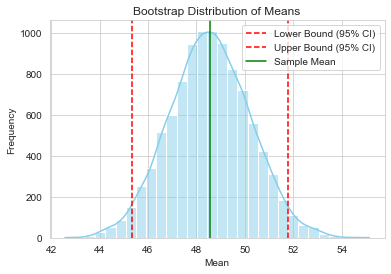

In [10]:
# Plot the distribution of bootstrap means and the 95% confidence interval
sns.histplot(bootstrap_means, kde=True, color='skyblue', bins=30)
plt.axvline(ci_95[0], color='red', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(ci_95[1], color='red', linestyle='--', label='Upper Bound (95% CI)')
plt.axvline(sample_mean, color='green', linestyle='-', label='Sample Mean')
plt.title('Bootstrap Distribution of Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Interpreting the Plot

- The green line represents the sample mean.
- The red dashed lines indicate the 95% confidence interval bounds.
- Most bootstrap means fall within the confidence interval, showing the range where the true population mean is likely to lie.

## Comparing Confidence Intervals of Two Groups

Confidence intervals can be used to compare two groups to assess whether their means are significantly different. Let's simulate two groups and visualize their confidence intervals.

In [11]:
# Generate two samples representing two groups
group1 = np.random.normal(50, 5, 12)
group2 = np.random.normal(55, 5, 12)

# Bootstrap confidence intervals for both groups
bootstrap_means_group1 = [np.mean(np.random.choice(group1, size=12, replace=True)) for _ in range(10000)]
bootstrap_means_group2 = [np.mean(np.random.choice(group2, size=12, replace=True)) for _ in range(10000)]

ci_group1 = np.percentile(bootstrap_means_group1, [2.5, 97.5])
ci_group2 = np.percentile(bootstrap_means_group2, [2.5, 97.5])
ci_group1, ci_group2

(array([45.81242825, 51.81771655]), array([54.48395704, 57.82535958]))

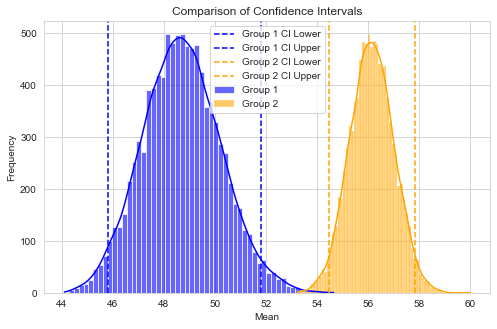

In [12]:
# Visualize the confidence intervals of both groups
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means_group1, kde=True, color='blue', label='Group 1', alpha=0.6)
sns.histplot(bootstrap_means_group2, kde=True, color='orange', label='Group 2', alpha=0.6)
plt.axvline(ci_group1[0], color='blue', linestyle='--', label='Group 1 CI Lower')
plt.axvline(ci_group1[1], color='blue', linestyle='--', label='Group 1 CI Upper')
plt.axvline(ci_group2[0], color='orange', linestyle='--', label='Group 2 CI Lower')
plt.axvline(ci_group2[1], color='orange', linestyle='--', label='Group 2 CI Upper')
plt.title('Comparison of Confidence Intervals')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Conclusion

Confidence intervals are a powerful tool for estimating the range of plausible values for a population parameter and assessing statistical significance. They allow us to compare groups visually and quantitatively, aiding in data interpretation.